In [127]:
import pandas as pd
import numpy as np
import os

In [128]:
file_path = "/Users/liusenyuan/Desktop/方正证劵/project2/data.xlsx"
df = pd.read_excel(file_path)
df

,Date,Price,不择时净值
0,2005-01-04,984.9190,1.000000
1,2005-01-05,975.7210,0.990661
2,2005-01-06,965.1900,0.979969
3,2005-01-07,965.4270,0.980210
4,2005-01-10,992.1640,1.007356
...,...,...,...
3671,2020-02-14,6277.2655,6.373382
3672,2020-02-17,6389.0200,6.486848
3673,2020-02-18,6324.6354,6.421478
3674,2020-02-19,6323.1517,6.419971


In [129]:
#calculate absolute value 
absolute_value = [1]
for i in range(1,len(df['Date'])):
    new_value = (df['Price'][i]/df['Price'][i-1])*absolute_value[i-1]
    absolute_value.append(new_value)

    

In [131]:
def MA(a):
    MA = []
    for i in range(len(df['Date'])):
        if i<a-1:
            MA.append(0)
        else:
            add_value = sum(df['Price'][i-(a-1):i+1])/a
            MA.append(add_value)
    return MA
df['MA9']=MA(9)
df['MA77']=MA(77)
df

,Date,Price,不择时净值,MA9,MA77
0,2005-01-04,984.9190,1.000000,0.000000,0.000000
1,2005-01-05,975.7210,0.990661,0.000000,0.000000
2,2005-01-06,965.1900,0.979969,0.000000,0.000000
3,2005-01-07,965.4270,0.980210,0.000000,0.000000
4,2005-01-10,992.1640,1.007356,0.000000,0.000000
...,...,...,...,...,...
3671,2020-02-14,6277.2655,6.373382,6235.282589,6673.084217
3672,2020-02-17,6389.0200,6.486848,6255.151967,6668.845626
3673,2020-02-18,6324.6354,6.421478,6268.252133,6663.785530
3674,2020-02-19,6323.1517,6.419971,6276.497967,6657.739355


In [132]:
position = False#持仓
golden_cross = False
golden_cross_price = 0
absolute = [1]
near_gold = False 
trade = 0
for i in range(1,len(df['Date'])):
    #判断金叉:
    if (df['MA9'][i-1]<df['MA77'][i-1]) and (df['MA9'][i]>df['MA77'][i]):
        golden_cross = True
        golden_cross_price = df['Price'][i]
        near_gold = True
        
    #判断死叉:
    elif (df['MA9'][i-1]>df['MA77'][i-1]) and (df['MA9'][i]<df['MA77'][i]):
        golden_cross = False
        near_gold = False
    else:
        golden_cross = False
    
    if position==False:#空仓情况下
        if golden_cross == True:
            absolute.append(absolute[i-1])
            position = True
            trade+=1
        
        elif (near_gold == True) and (df['Price'][i]>golden_cross_price):
            absolute.append(absolute[i-1])
            position = True
            trade+=1
        else:
            absolute.append(absolute[i-1])
            position = False
            
            
            
    else:#持仓情况下
        if df['Price'][i]<golden_cross_price:
            position = False#卖出，变为空仓
            trade+=1
            absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
        else:
            absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
            position = True #不卖，保持持仓   

In [133]:
df['择时净值'] = absolute
df

,Date,Price,不择时净值,MA9,MA77,择时净值
0,2005-01-04,984.9190,1.000000,0.000000,0.000000,1.000000
1,2005-01-05,975.7210,0.990661,0.000000,0.000000,1.000000
2,2005-01-06,965.1900,0.979969,0.000000,0.000000,1.000000
3,2005-01-07,965.4270,0.980210,0.000000,0.000000,1.000000
4,2005-01-10,992.1640,1.007356,0.000000,0.000000,1.000000
...,...,...,...,...,...,...
3671,2020-02-14,6277.2655,6.373382,6235.282589,6673.084217,18.489686
3672,2020-02-17,6389.0200,6.486848,6255.151967,6668.845626,18.489686
3673,2020-02-18,6324.6354,6.421478,6268.252133,6663.785530,18.489686
3674,2020-02-19,6323.1517,6.419971,6276.497967,6657.739355,18.489686


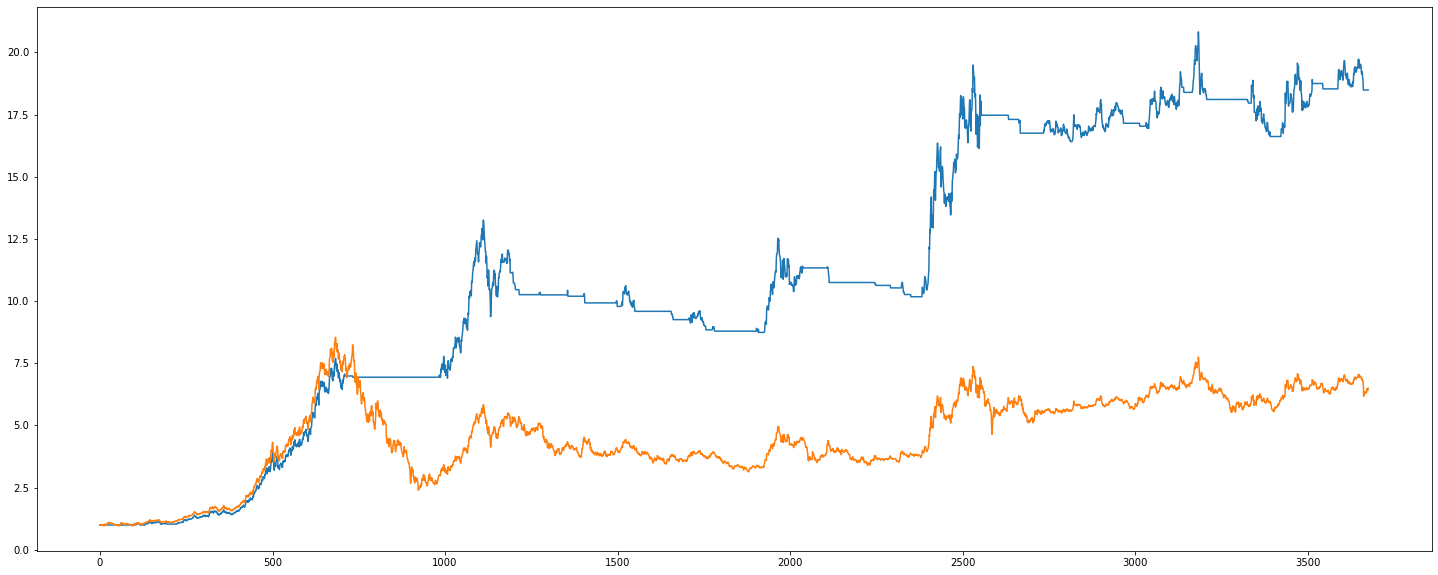

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))
plt.plot(absolute)
plt.plot(absolute_value)

In [135]:
#年化收益率
ARR = (df['择时净值'][3675])**(242/3676)-1
print('年化收益率：',ARR)

年化收益率： 0.21172772614662705


In [136]:
#最大回撤
drawdown = [0]
for i in range (1,len(absolute)):
    drawdown.append(absolute[i-1]/max(absolute[0:i])-1)
max_drawdown = min(drawdown)
print('最大回撤：',max_drawdown)

最大回撤： -0.34083444655541484


In [137]:
#sharpe
ret_list = [0]
for i in range(1, len(df['择时净值'])):
    ret_list.append((df['择时净值'][i] / df['择时净值'][i-1]) - 1)

import math
volatility = np.std(ret_list,ddof=1)*math.sqrt(242)
sharpe = ARR/volatility
print('夏普比率：',sharpe)

夏普比率： 1.002286154092733


In [138]:
#平均持仓天数
position_day = 3676/trade
print('平均持仓天数: ',position_day)

平均持仓天数:  29.174603174603174


In [143]:
def absolute_value(x,y):
    file_path = "/Users/liusenyuan/Desktop/方正证劵/project2/data.xlsx"
    df = pd.read_excel(file_path)
    position = False#持仓
    golden_cross = False
    golden_cross_price = 0
    absolute = [1]
    near_gold = False 
    trade = 0

    for i in range(1,len(df['Date'])):
        #判断金叉:
        if (MA(x)[i-1]<MA(y)[i-1]) and (MA(x)[i]>MA(y)[i]):
            golden_cross = True
            golden_cross_price = df['Price'][i]
            near_gold = True

        #判断死叉:
        elif (MA(x)[i-1]>MA(y)[i-1]) and (MA(x)[i]<MA(y)[i]):
            golden_cross = False
            near_gold = False
        else:
            golden_cross = False

        if position==False:#空仓情况下
            if golden_cross == True:
                absolute.append(absolute[i-1])
                position = True
                trade+=1

            elif (near_gold == True) and (df['Price'][i]>golden_cross_price):
                absolute.append(absolute[i-1])
                position = True
                trade+=1
            else:
                absolute.append(absolute[i-1])
                position = False



        else:#持仓情况下
            if df['Price'][i]<golden_cross_price:
                position = False#卖出，变为空仓
                trade+=1
                absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
            else:
                absolute.append(absolute[-1]*(df['Price'][i]/df['Price'][i-1]))
                position = True #不卖，保持持仓   
    return absolute